In [1]:
import pandas as pd
import numpy as np
import os
import pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
def load_data(data_path, mic_path,figure_path, cor_type, type_name):
    metric = "test_nse"
    raw_data = pd.read_csv(data_path)

    raw_data = raw_data.drop(raw_data[raw_data[metric]<0].index)

    group_data = raw_data[metric].groupby([raw_data["output"], raw_data["time_steps"]])
    data_1 = group_data.describe()


    mic_data = pd.read_csv(mic_path)
    mic_data.columns = ["time_steps", 'output',"MIC", "CS", "DC", "PC", "SC", "KC"]
    
    mic_data.set_index(["output", "time_steps"], inplace=True)


    data = data_1.join(mic_data, on=["output", "time_steps"])
    data["type"] = type_name
    return data

In [3]:
type_name_list= ["YRB-M", "YRB-U", "HRB-M", "HRB-U"]
count = 0
for cor_type in ["cc"]:
    
    data_list = []
    for region in ["yichang", "ziya"]:
        figure_path = ""
        for test in ["a", "c"]:
            data_name = test + "_train_results.csv"
            region_path = os.path.join("../test_2", region)
            data_path = os.path.join(region_path, data_name)

            mic_file_name = "relation_" + region + "_max_" + test + "_7.csv"
            
            mic_path = os.path.join("../relation_data", mic_file_name)
            
            type_name = type_name_list[count]
            count += 1
            process_data = load_data(data_path, mic_path, figure_path, cor_type, type_name)
            data_list.append(process_data)

    data = pd.concat(data_list, axis=0, ignore_index=True)

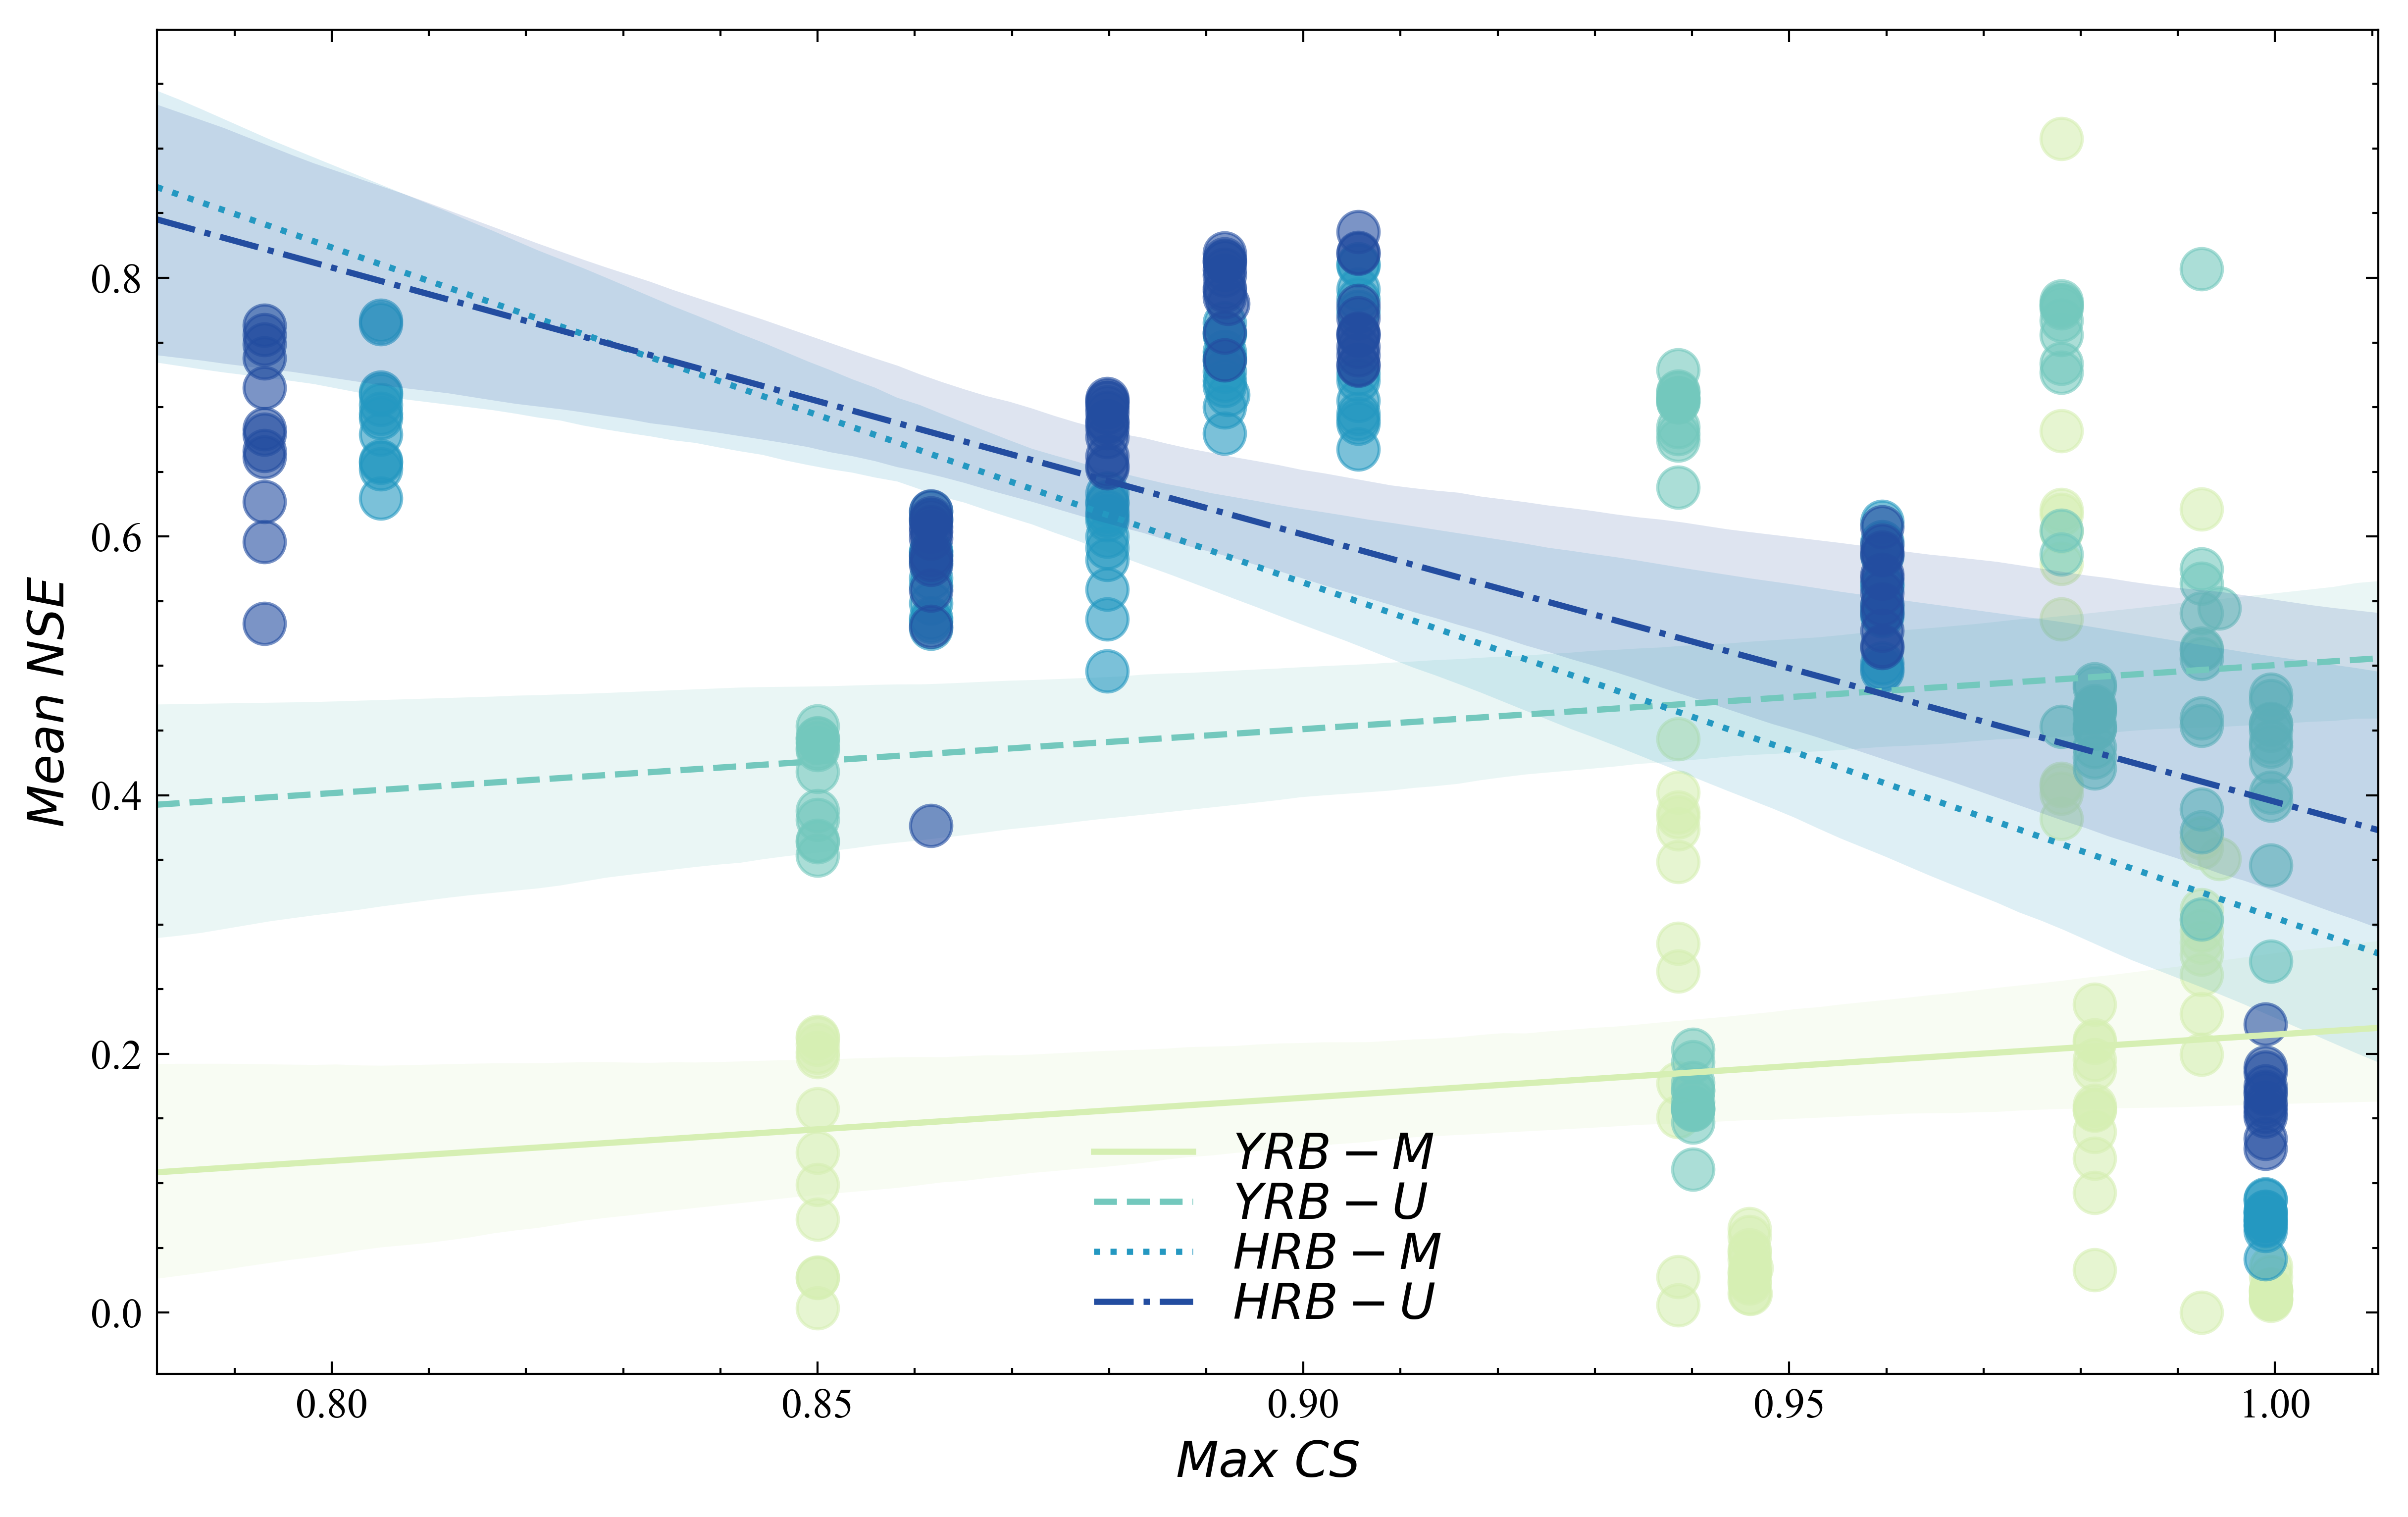

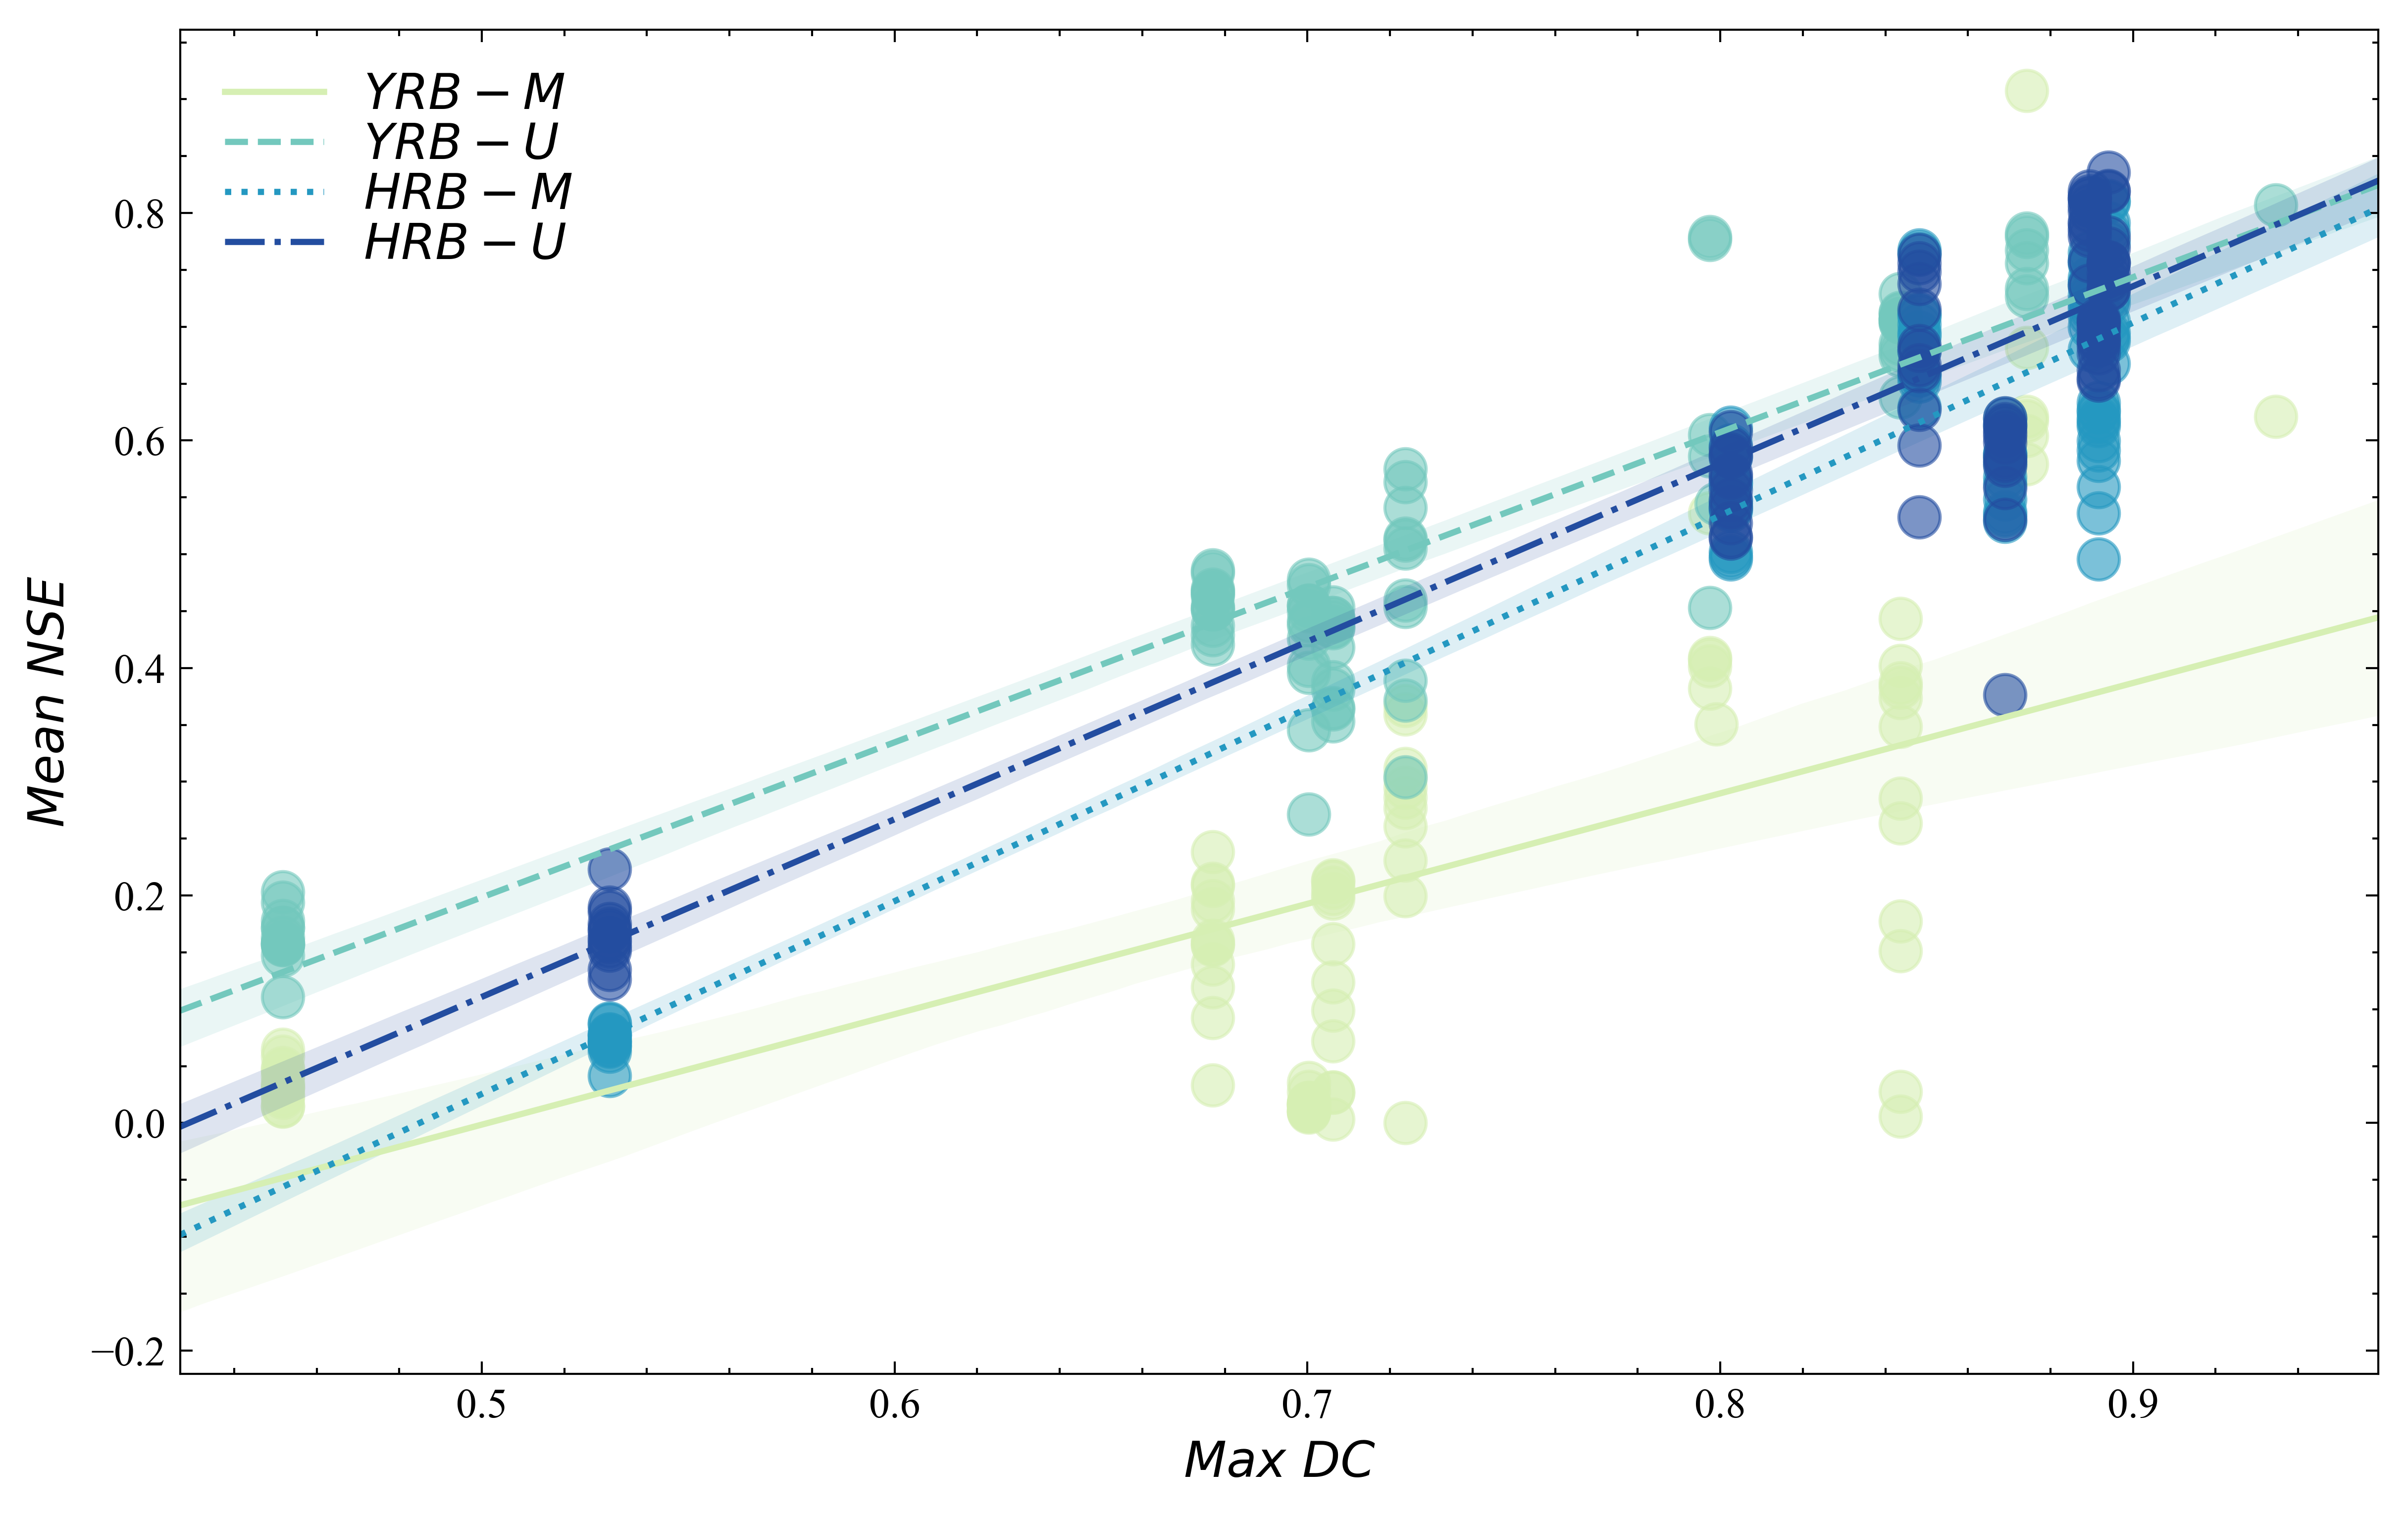

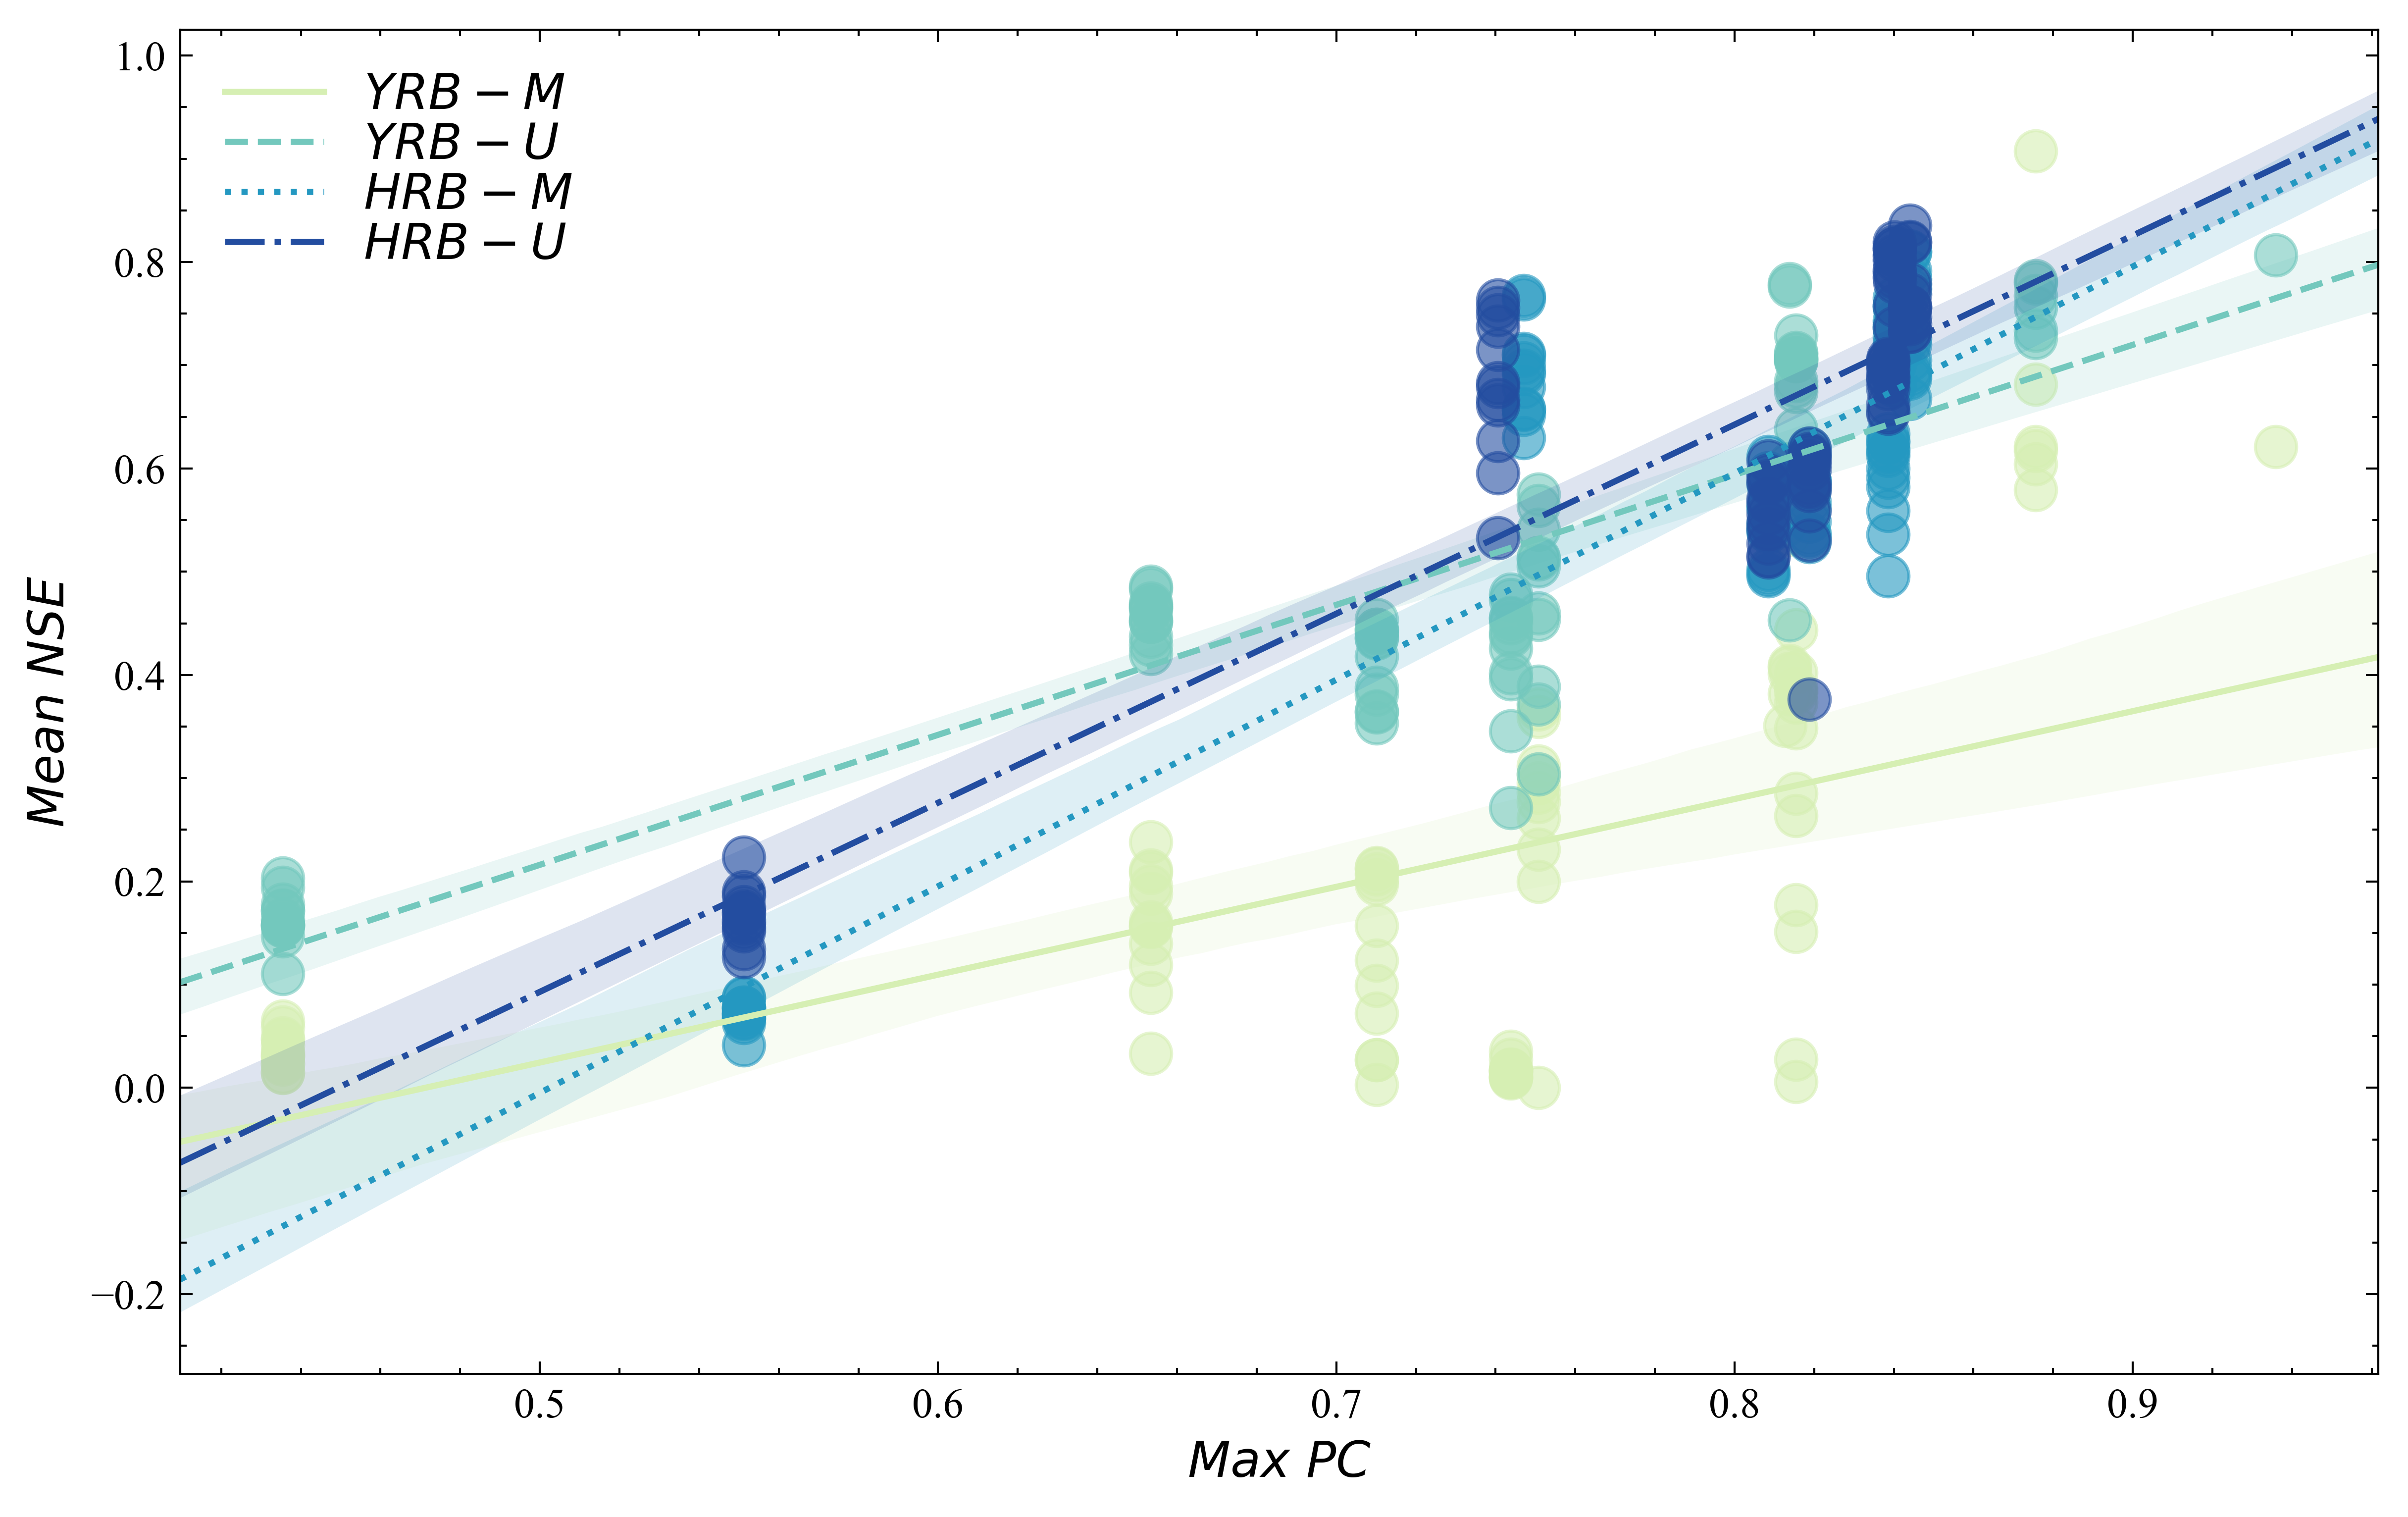

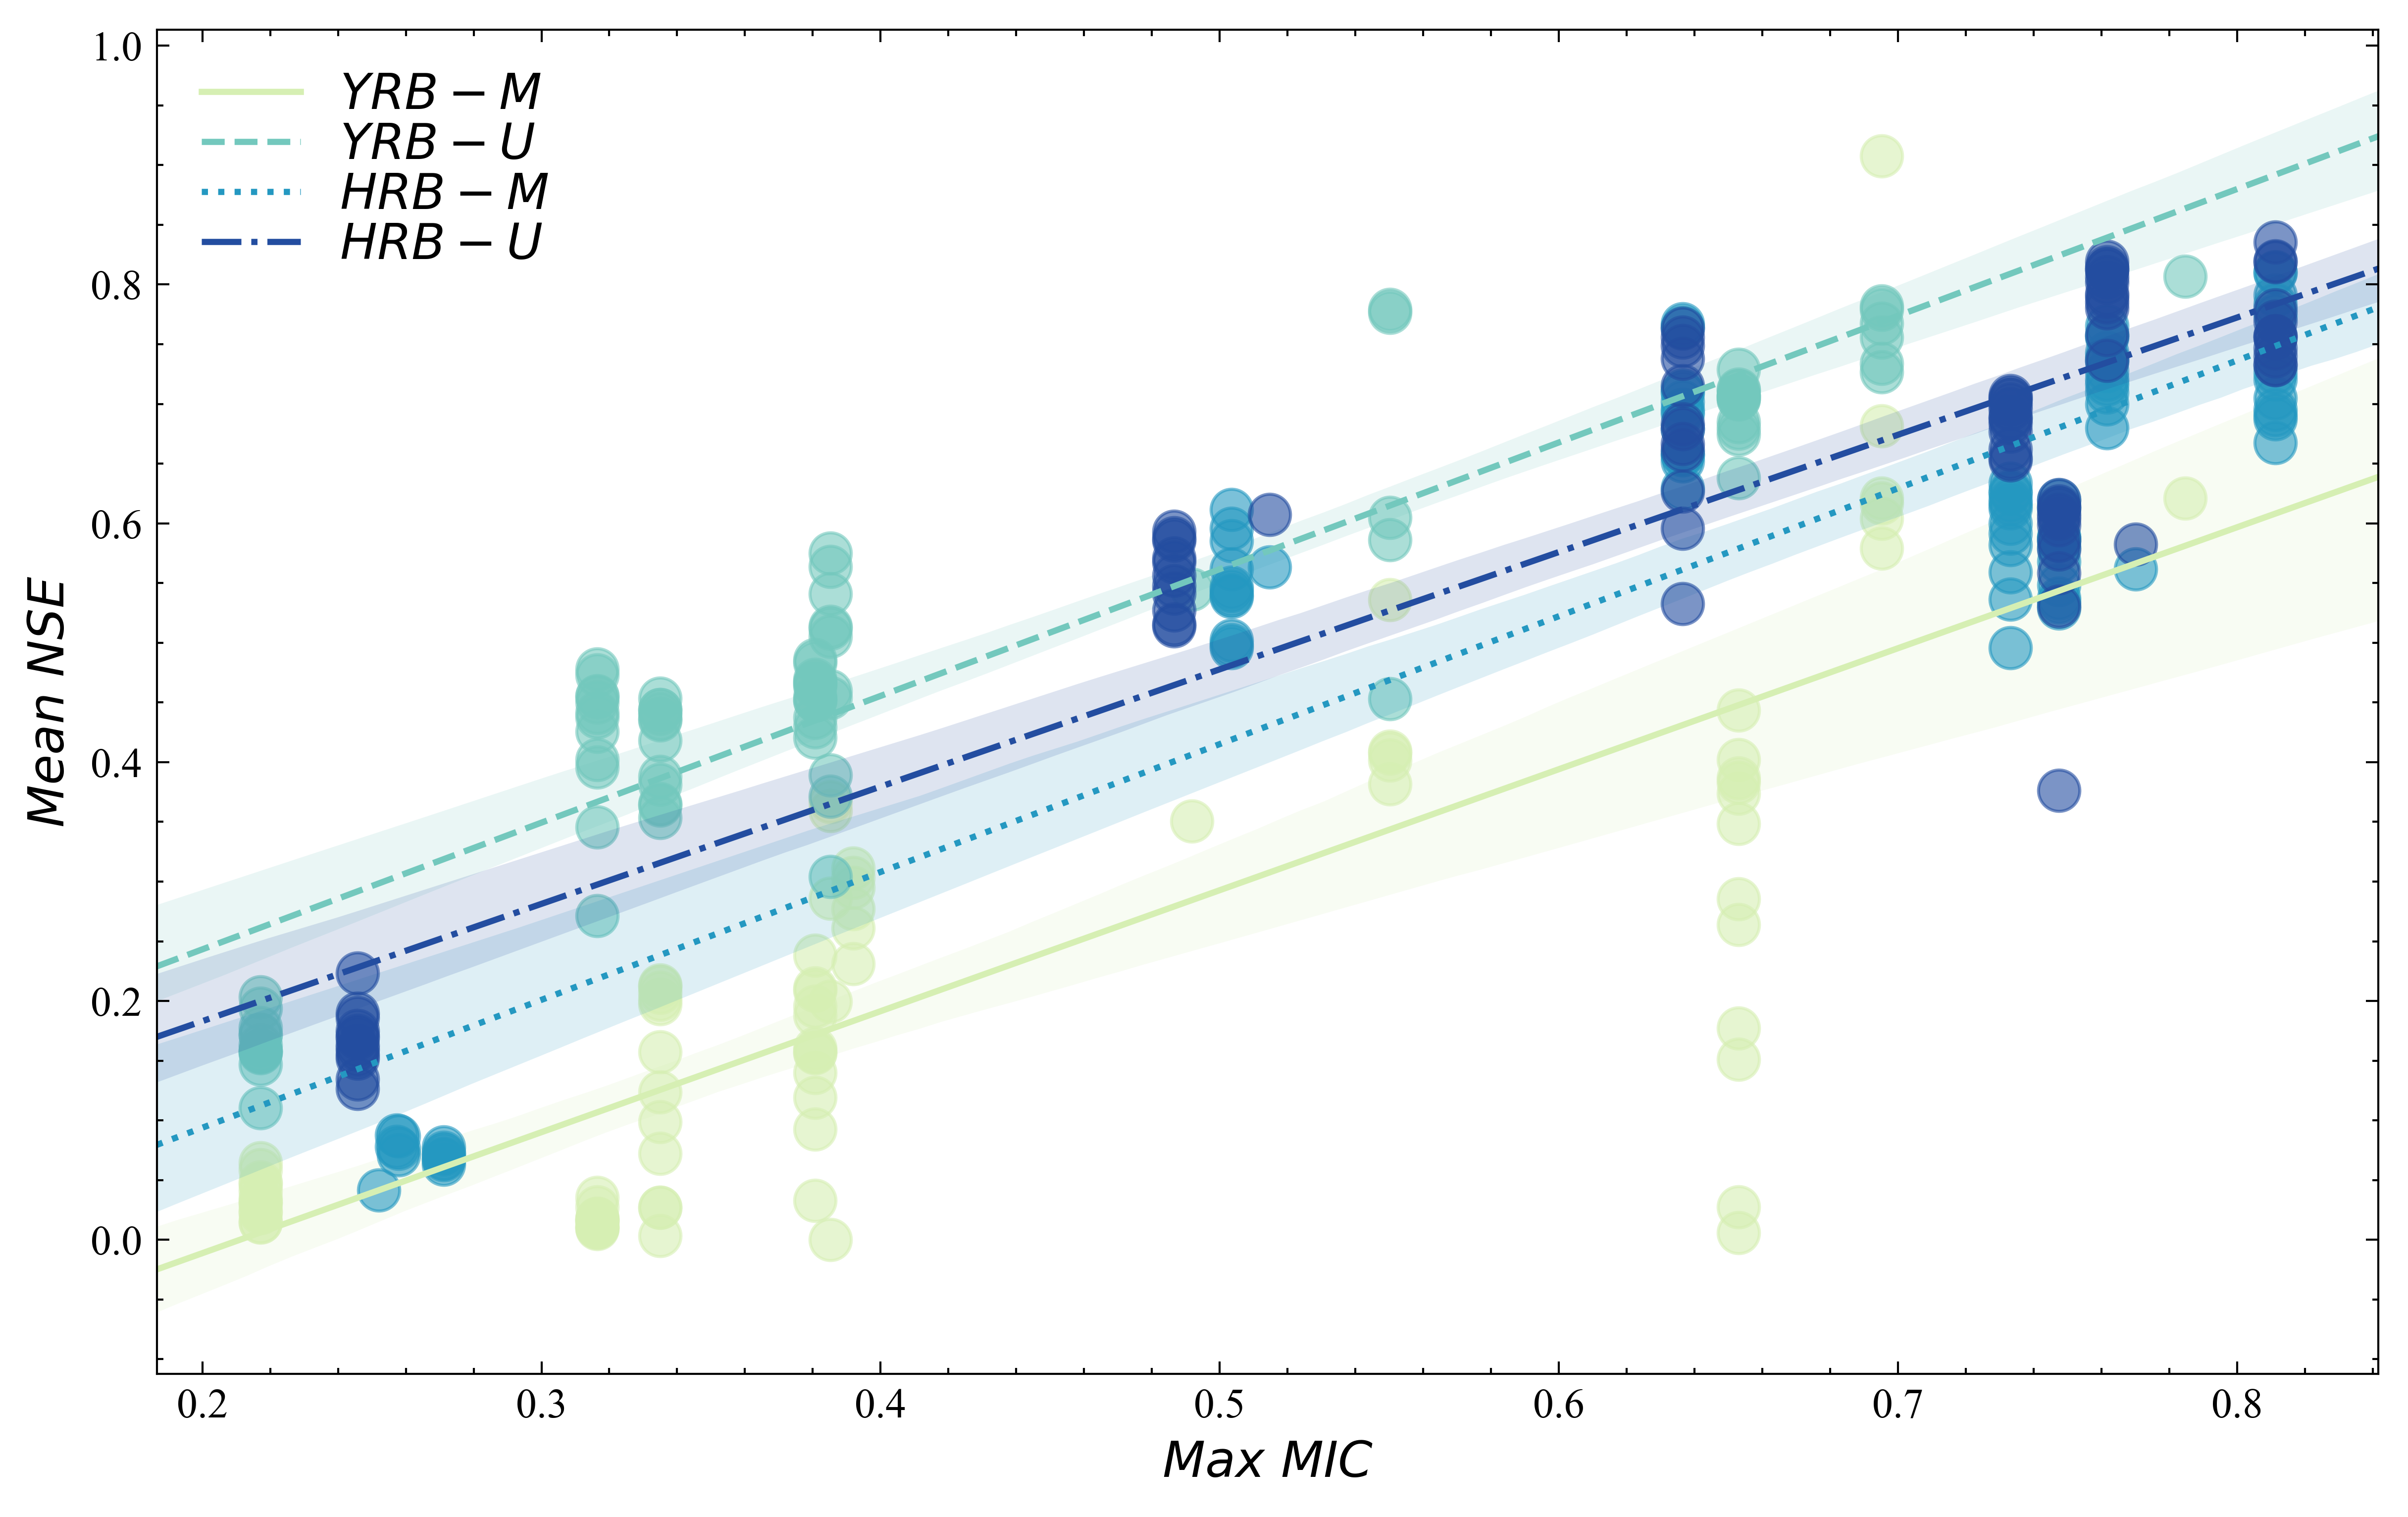

In [4]:
with plt.style.context(['science','no-latex', 'ieee']):
    metrics = ["CS", "DC", "PC", "MIC"]
    for metric in metrics:
        plt.rc('font', family='Times New Roman')
        plt.rcParams["font.size"] = 10

        g_2 = sns.lmplot(x=metric, y="mean", data=data, legend = False, hue="type", 
                         legend_out=False, 
                         truncate=False,
                         aspect=1.6, 
                         robust=True, 
                         palette='YlGnBu',#ci=0.5, 
                         scatter_kws=dict(s=100, linewidths=0.75, alpha=0.6)
                        )
        g_2.ax.spines['right'].set_visible(True)
        g_2.ax.spines['top'].set_visible(True)
        plt.xlabel("$Max\ " + metric + "$", fontsize=12)
        plt.ylabel("$Mean\ NSE$", fontsize=12)
        plt.legend()
        labels_0 = ("$YRB-M$", "$YRB-U$", "$HRB-M$", "$HRB-U$")
        plt.legend(labels_0, labelspacing=0.1, fontsize=12)
        figure_name_2 = metric +".jpg"
        plt.savefig(figure_name_2, dpi=1000, bbox_inches="tight")